# PREDICTING HOUSE PRICES IN AMES, IOWA: ADVANCED REGRESSION TECHNIQUES

## Author: Boni M. Ale, MD, MSc, MPH

### Date: 29 April 2022

# **1. Introduction**

The Ames Housing dataset is a famous and widely used dataset in the field of machine learning and statistics. It contains information on 1,460 residential properties sold in Ames, Iowa between 2006 and 2010. The dataset contains a wide range of information about each property, including its location, size, age, condition, and various features such as the number of bedrooms, bathrooms, and other amenities. 

The dataset was compiled by Dean De Cock for use in data analysis and regression modeling competitions, and is often used as a benchmark dataset in the field.

I will use this data set to predict the house prices in IOWA using selected advanced regression techniques and compare the performance of each of them. 

#### *Load Libraries*

In [1]:
## For data wrangling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler


## For ML models 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

#### *Load dataset*

In [2]:
ames_raw = pd.read_csv("./Ames_HousePrice.csv", index_col=0)
ames_raw.head(10)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
6,908128060,1922,198500,85,RL,64.0,7301,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal
7,902135020,936,93000,20,RM,60.0,6000,Pave,Pave,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
8,528228540,1246,187687,20,RL,53.0,3710,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,3,2008,New,Partial
9,923426010,889,137500,20,RL,74.0,12395,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
10,908186050,1072,140000,180,RM,35.0,3675,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


#### *Data description*

In [3]:
print("Raw Data Set's size: ", ames_raw.shape)

#separate variables into new data frames
numeric_data = ames_raw.select_dtypes(include=[np.number])
cat_data = ames_raw.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in ames raw data".format(numeric_data.shape[1],cat_data.shape[1]))


Raw Data Set's size:  (2580, 81)
There are 38 numeric and 43 categorical columns in ames raw data


The data dictionnary can be found [here](https://www.kaggle.com/competitions/stat101ahouseprice/data)

# 2. Exploratory Data Analysis

At this stage we will explore the data by showing graph and show relationship between variables. 

## **2. 1. Numerical Variables Exploration**
Let's show all numerical variables using an histograms. This will allow us to see the distribution of each variable. 

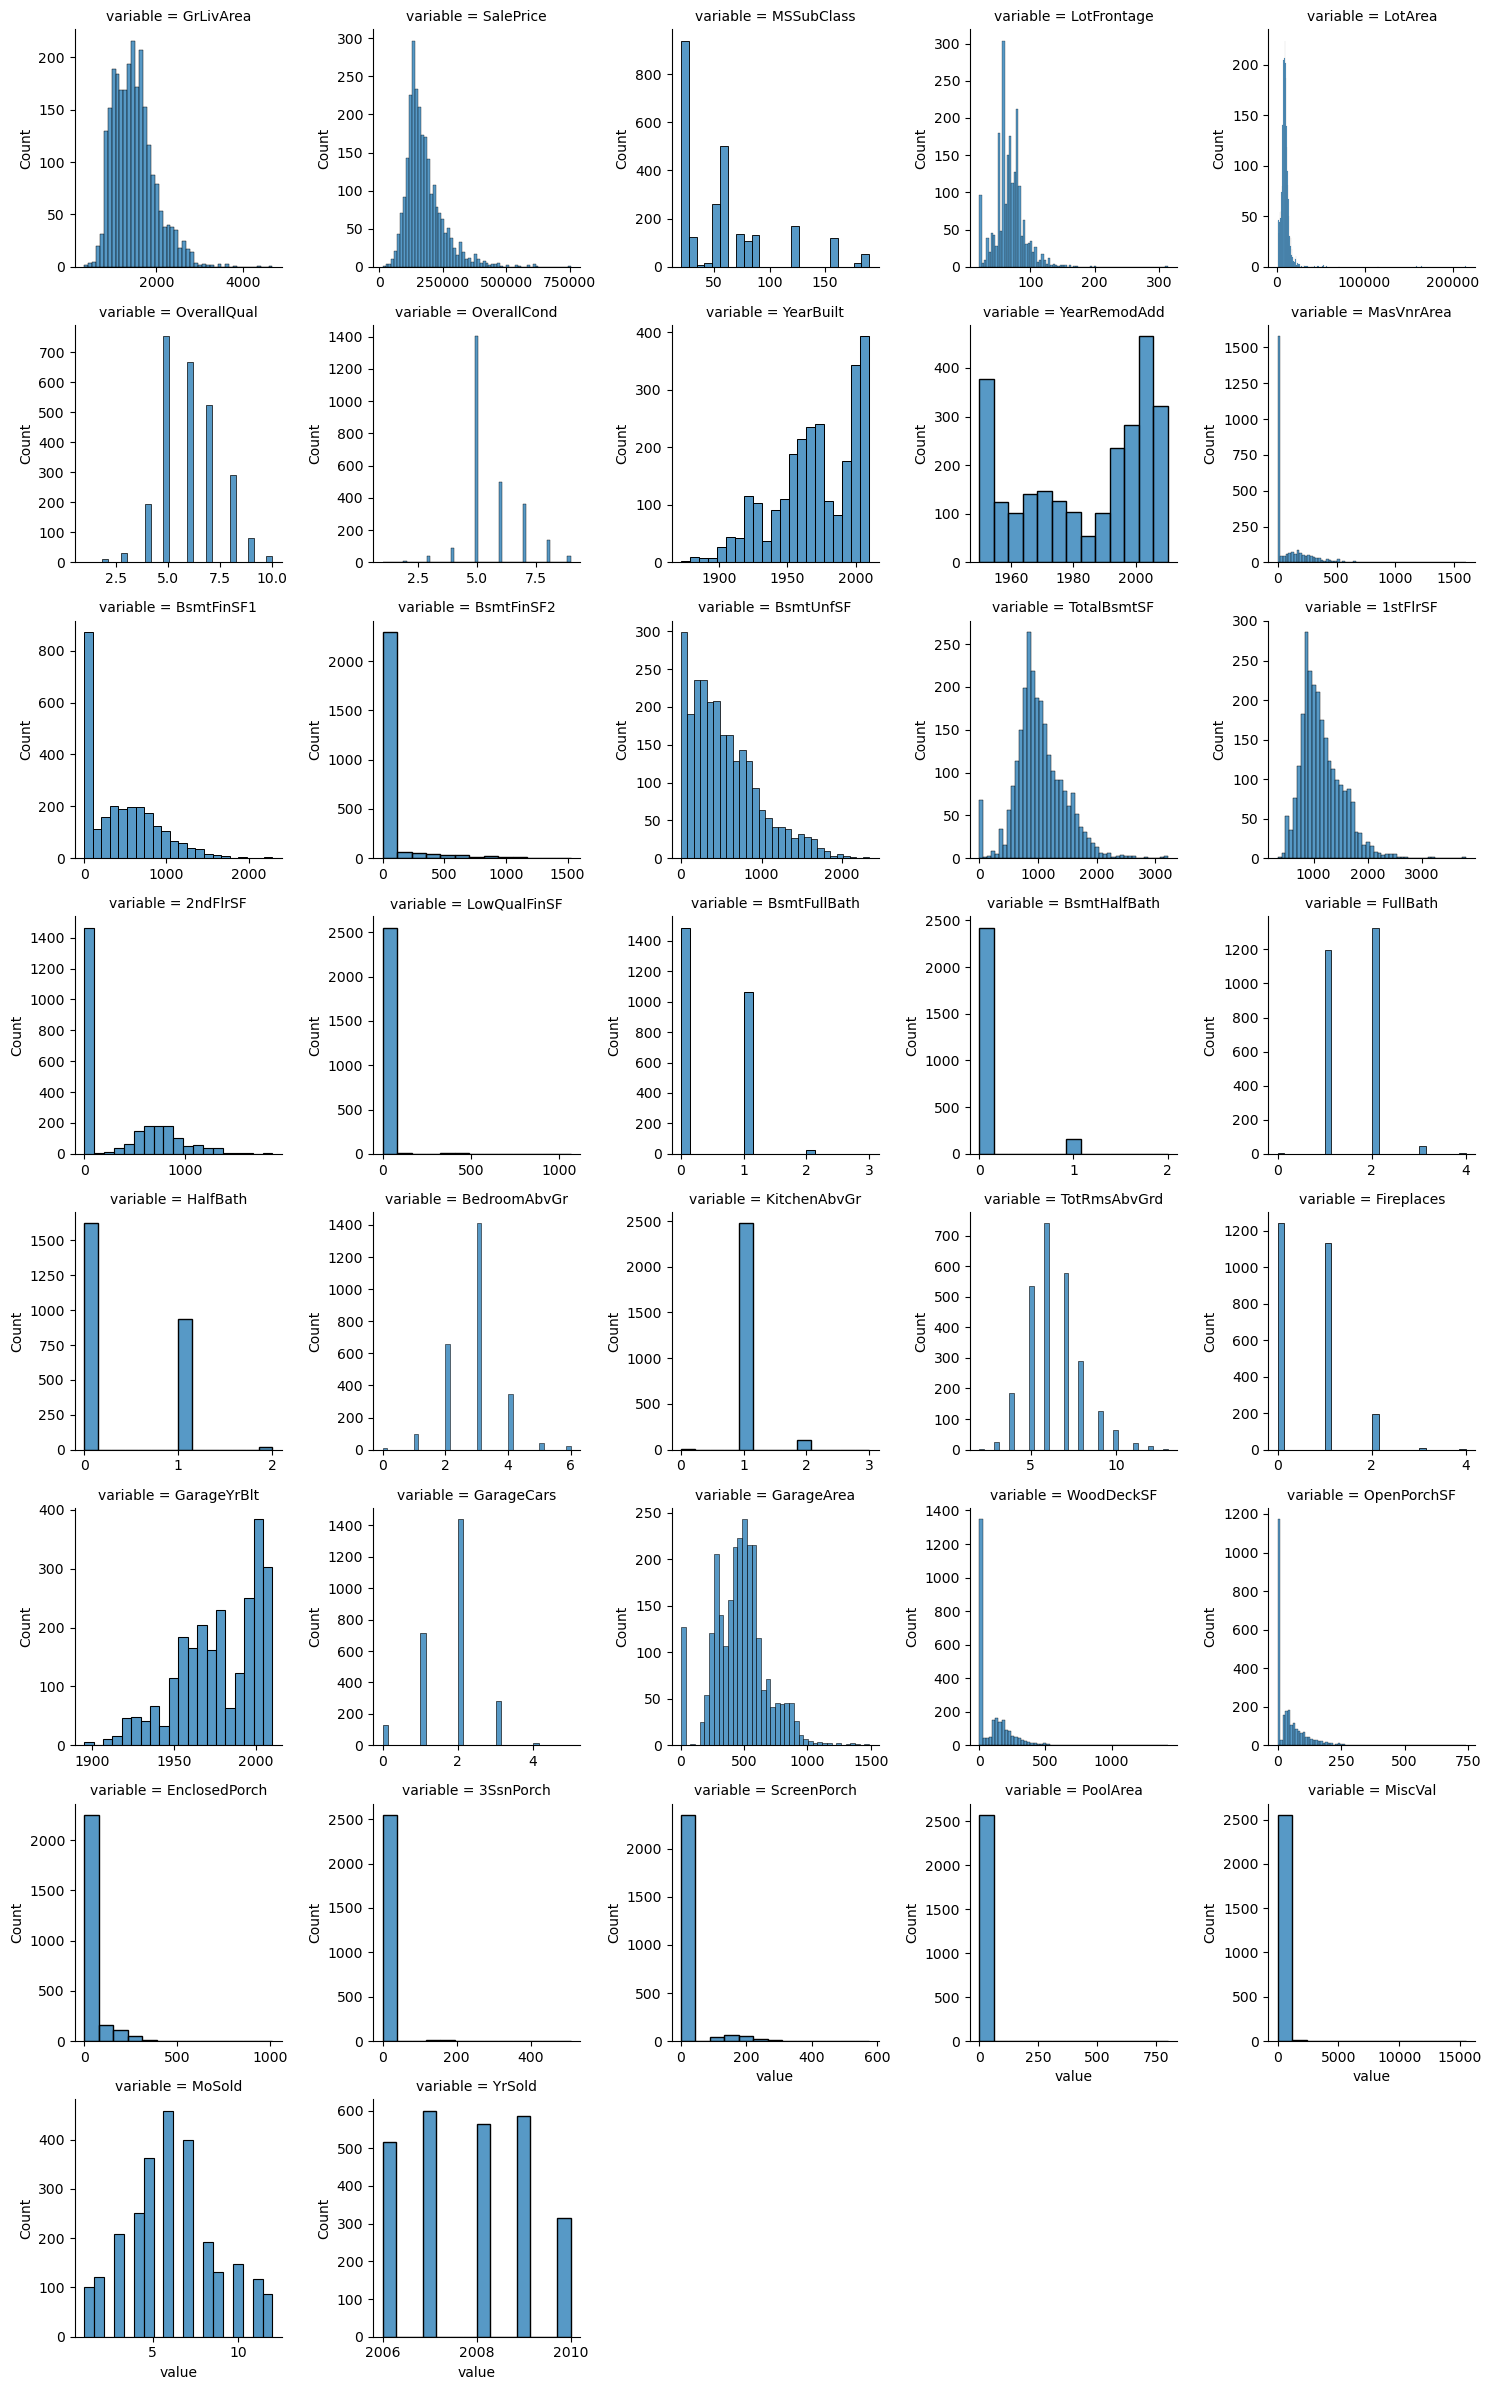

In [4]:
num = [f for f in ames_raw.columns if ames_raw.dtypes[f] != 'object']
num.remove('PID')
num

nd = pd.melt(ames_raw, value_vars = num)
nd
barplot_ames = sns.FacetGrid (nd, col='variable',
                    col_wrap=5, 
                    sharex=False, 
                              sharey = False
                   )
barplot_ames = barplot_ames.map(sns.histplot, 'value')
plt.show("barplot_ames")

We can see that several variables are not normally distributed. Our target variable which is sale price is right skewed. Let's confirm this with qqnorm plot and check its Skewness and Kurtosis statistics.

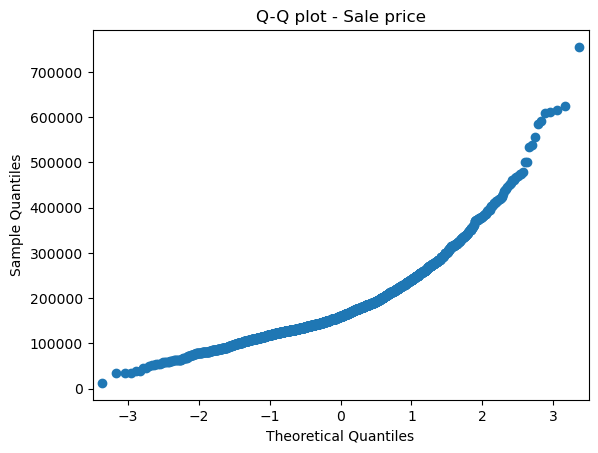

In [5]:
fig_qqplot = sm.qqplot(ames_raw.loc[:,"SalePrice"])
plt.title("Q-Q plot - Sale price")
plt.show()

In [6]:
print(f"""Skewness: {ames_raw.loc[:,"SalePrice"].skew()}
Kurtosis: {ames_raw.loc[:,"SalePrice"].kurt()}""")

Skewness: 1.7608017894946901
Kurtosis: 5.432800105464818


The skewness is less than 2 which is considered indicative of non-substantial nonnormality." (Hair et al., 2022, p. 66). However, the kurtosis is more than 2 which indicate that the distribution is too peaked as opposed to what the skewness statistics was showing. 

## **2. 2. Categorical Variables Exploration**

In [ ]:
def boxplot(x,
            y,
            **kwargs
           ):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)
            

ames_data_cat = [f for f in ames_raw.columns if ames_raw.dtypes[f] == 'object']

boxplot_data_ames = pd.melt(ames_raw, id_vars='SalePrice', value_vars=ames_data_cat)

boxplot_ames = sns.FacetGrid(boxplot_data_ames, 
    col='variable', 
    col_wrap=3, 
    sharex=False, 
    sharey=False,
    height=5)


boxplot_ames = boxplot_ames.map(boxplot, 'value','SalePrice')
plt.show()

Some variables like: 
- General zoning classification of the sale (ms_zoning)
- street
- alley
- utilities
- proximity to various conditions (if more than one is present) (condition2)
- building type
- roof material
- masonry veneer type
- external quality and external condition
- presence of heating and Heating quality and condition (heating_qc)
- Present condition of the material on the exterior(exter_cond)
- Height of the basement (bsmt_qual)
- General condition of the basement (bsmt_cond)
- Walkout or garden level basement walls: Refers to walkout or garden level walls (bsmt_exposure)
- kitchen quality
- neighborhoods

seems to be associated with house prices. 


## 2.3. Data Wrangling

### 2.3.1. Missing Data 

#### 2.3.1.1. Missing data exploration

Let's identify any missing value. Depending on the extend, we will decide on droping the variable or imput the data based on the missingness mecanism. 

In [ ]:
mis_data_count = ames_raw.isnull().sum()
mis_data_percent = ames_raw.isnull().sum() / len(ames_raw) * 100

missing_dataframe = pd.DataFrame({
    'Count': mis_data_count,
    'Percent': mis_data_percent
})



missing_dataframe = missing_dataframe[missing_dataframe.Count > 0]
missing_dataframe.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_dataframe.shape[0]} features having missing data.\n")
print("Top 15 missing value features:")
missing_dataframe.head(15)

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(y=missing_dataframe.index,
            x=missing_dataframe.Count,
            palette='GnBu_r')
title = plt.title("Missing Values")
plt.show()

From the above table and graph, we can see that 15 categorical variabeles *(PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, MasVnrType)* and 10 numerical variables *(GarageArea, GarageCars, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, MasVnrArea)* and other 3 variables *(Electrical, LotFrontage, GarageYrBlt)* were missing. 

However, for the categorical and numerical variables in this list, if we consult the data dictionary, these are variables with None recording as NA or 0 recorded as NA. This means these variables are not really missing but need to be recoded. For the other 3 variables, I will perform some imputations. 

#### 2.3.1.2. Missing data recoding and imputation


##### ==> Categorical Variables recoding

In [ ]:
cat_missing = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]
ames_raw[cat_missing] = ames_raw[cat_missing].fillna("None")

##### ==> Numerical Variables recoding

In [ ]:
num_missing = [
    'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'
]

ames_raw[num_missing] = ames_raw[num_missing].fillna(0)

##### ==> Data Imputation for specific variables

Here, I will make some decision about each variables. 

For instance, 
- I will impute Functional, MSZoning, Electrical, KitchenQual, Exterior1st, Exterior2nd, SaleType, Utilities with their modes because these variables has several levels
- I will impute LotFrontage with its mean because this is a continuous variable, and 
- I will impute GarageYrBlt with YearBuilt because the garage are probably built the same year as the houses. 

In [ ]:
specific_vars = [
    'Functional', 'MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st',
    'Exterior2nd', 'SaleType', 'Utilities'
]


imputer = SimpleImputer(strategy='most_frequent')
ames_raw[specific_vars] = pd.DataFrame(imputer.fit_transform(ames_raw[specific_vars]), index=ames_raw.index)

ames_raw.LotFrontage = ames_raw.LotFrontage.fillna(ames_raw.LotFrontage.mean())
ames_raw.GarageYrBlt = ames_raw.GarageYrBlt.fillna(ames_raw.YearBuilt)

We can now check if there is still any missing data in our database

In [ ]:
sum(ames_raw.isnull().sum())

Fantastic! We have now no missing data in our database. All missing data have been handled. 

### 2.3.2. Data Cleaning
In this sub-section, I will explore the need to recode variable, create new variables out of the existing and reshape some. 

#### 2.3.1.1. Label Encoding

For the purpose of regression later, we will process the data in such a way that all categorical variables are encoded to enable the implementation of regression models in python. 

In [ ]:
# categorical columns
ames_data = ames_raw.drop([
                    "PID"
                   ], axis = 1)
label_encoding_cols = [
    # "MSSubClass", "MSZoning", "Street", "Alley","LotShape","LandContour","Utilities",
    # "LotConfig", "LandSlope","Neighborhood", "Condition1", "Condition2","BldgType",
    # "HouseStyle", "OverallQual", "OverallCond","RoofStyle", "RoofMatl", "Exterior1st",
    # "Exterior2nd", "MasVnrType",  "ExterQual", "ExterCond","Foundation", "BsmtQual","BsmtCond",
    # "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional",
    # "FireplaceQu", "GarageType", "GarageFinish","GarageQual","GarageCond", "PavedDrive", "PoolQC",
    # "Fence", "MiscFeature", "SaleType", "SaleCondition"
    
   
    "Alley", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
    "BsmtQual", "ExterCond", "ExterQual", "FireplaceQu", "Functional",
    "GarageCond", "GarageQual", "HeatingQC", "KitchenQual", "LandSlope",
     "LotShape", "PavedDrive", "PoolQC", "Street", "Utilities"
    
]

# Apply Label Encoder
label_encoder = LabelEncoder()

for col in label_encoding_cols:
            ames_data[col] = label_encoder.fit_transform(ames_data[col])

#### 2.3.1.2. Correlations 
This part will help us identify, variables that would play a critical role in our models prediction. 

In [ ]:
## Check correlation between sales price and features for prediction
ames_data.corr()['SalePrice'].sort_values(ascending=False)

In [ ]:
## Check this graphically 
plt.figure(figsize = (12,10))
barplot_corr = ames_data.corr()['SalePrice'].sort_values(ascending=True).plot(kind='barh')
plt.show("barplot_corr")

In [ ]:
# Let's create a correlation matrix from train data excluding `SalePrice`
corr_mat =  ames_data.iloc[:, :-1].corr()

# Let's select only correlations greater than 0.6
high_corr_mat = corr_mat[abs(corr_mat) >= 0.6]

# Plot a heatmap Showing Correlation between features and Sale Prices
plt.figure(figsize=(15, 10))
corr_heatmap = sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Heatmap Showing Correlation between Features')
plt.show("corr_heatmap")

   The main variables which are highly positively correlated (> 60 %) with sale prices are: 
   - Rates the overall material and finish of the house (OverallQual)
   - Above grade (ground) living area square feet (GrLivArea)
   - Total square feet of basement area (TotalBsmtSF)
   - First Floor square feet (1stFlrSF)
   - Size of garage in car capacity (GarageCars)
   - Size of garage in square feet (GarageArea)

#### 2.3.1.2. Variable Transformation

In [ ]:
transf_to_cat_cols = ['YrSold', 'MoSold', 'MSSubClass']

for col in transf_to_cat_cols:
    ames_data[col] = ames_data[col].apply(str)

### 2.3.3. Data Normalisation: Target 
We have already seen previously that our target variable is right-skewed. Therefore, we will apply a transformation to normalize it. 

In [ ]:
ames_data['SalePrice'] = np.log(ames_data['SalePrice'])

Let's check if it has worked. 

In [ ]:
fig_qqplot_new = sm.qqplot(ames_data.loc[:,"SalePrice"])
plt.title("Q-Q plot - Sale price")
plt.show("fig_qqplot_new")

Let's check its Skewness and Kurtosis statistics.

In [ ]:
print(f"""Skewness: {ames_data.loc[:,"SalePrice"].skew()}
Kurtosis: {ames_data.loc[:,"SalePrice"].kurt()}""")

As opposed to previously, both the Skewness  and Kurtosis statistic are close to 0 which is considered indicative of normality." (Hair et al., 2022, p. 66) 

### 2.3.4. Data Transformation: Scaling Features

Standardizing the data is a common preprocessing step that can help improve the performance of many machine learning algorithms. Standardization involves scaling the features of the data to have a mean of zero and a standard deviation of one.

We will use RobusteScaler because we have noticed that our input features have some outliers which can be easily handle in RobustScaler as opposed to StandardScaler. 

In [ ]:
numerical_cols = list(ames_data.select_dtypes(exclude=['object']).columns)
scaler = RobustScaler()
ames_data[numerical_cols] = scaler.fit_transform(ames_data[numerical_cols])

### 2.3.5. One-hot Encoding
One-hot encoding is a technique used to transform categorical data into a numerical representation that can be used for machine learning algorithms. The Scikit-learn library provides an easy-to-use implementation of one-hot encoding through the OneHotEncoder class.

In [ ]:
ames_data_encoded = pd.get_dummies(ames_data, drop_first=True)
print("ames_data_encoded.shape:", ames_data_encoded.shape)

print("ames_data.shape:", ames_data.shape)

**After all these wrangling process, our dataset is ready to perform modelling. Before that, let's split our dataset in train and test data**

In [ ]:
## Create X and Y axis 
X = ames_data_encoded.drop(["SalePrice"], axis = 1)
y = ames_data_encoded["SalePrice"]

## Now we will split out data set to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state = 5)

print("X_train.shape:", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

# 3. Modelling

## 3.1. Linear Regression

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

In [ ]:
## Let's make some predictions
y_train_predicted_log = linreg.predict(X_train)
y_test_predicted_log = linreg.predict(X_test)
y_train_predicted = np.exp(y_train_predicted_log)
y_test_predicted = np.exp(y_test_predicted_log)

**Score our “train” and “test” results of our linear regression model**

In [ ]:
## Score our “train” and “test” results.
linreg_train_r2 = linreg.score(X_train, y_train)
linreg_test_r2 = linreg.score(X_test, y_test)
print("\n***********************************Linear Regression Model Performance*******************************\n")
print("The train score for linear regression model is {}".format(linreg_train_r2))
print("The test score for linear regression model is {}".format(linreg_test_r2))

In [ ]:
 ## Let's measure the forecasting accuracy of our model using Root Mean Square Error (RMSE)
linreg_train_rmse_log = np.sqrt(mean_squared_error(y_train, y_train_predicted_log))
linreg_train_rmse = np.exp(linreg_train_rmse_log)
linreg_test_rmse_log = np.sqrt(mean_squared_error(y_test, y_test_predicted_log))
linreg_test_rmse = np.exp(linreg_test_rmse_log)
print("Training RMSE","Test RMSE")
print(linreg_train_rmse, linreg_test_rmse)   

In [ ]:
result_data = ames_data.iloc[ames_data.index.isin(X_train.index),:].copy()
result_data['y_predicted'] = np.exp(pd.Series(np.round(linreg.predict(X_train))))
result_data['SalePrice'] =  np.exp(np.round (result_data['SalePrice']))
result_data['y_diff'] = np.exp(np.round (result_data['SalePrice'] - result_data['y_predicted']))
result_data.loc[:,["SalePrice", "y_predicted", "y_diff"]].head(10)

We can assume 90 % to 95 % total overall performance of our linear regression model. 

## 3.2. Regularizing methods

Lasso and Ridge are both regularising methods, they aim to regularise complex models by introducing penalty factors. They are great at reducing overfitting, handling multicollinearity, or just automatic feature engineering. This might seem counterintuitive, but by making the model work harder to explain the training data, we get a better understanding of the underlying structure, and thus better generalisation and better fits on the test data.

The cost function for both ridge and lasso regression are similar. However, ridge regression takes the square of the coefficients and lasso takes the magnitude.

### Finetuning

We will start by defining a set of alphas to test Ridge and Lasso models. 

An alpha value of zero in either ridge or lasso model will have results similar to the regression model. 

The larger the alpha value, the more aggressive the penalization.

In [ ]:
## define a set of alphas to test Ridge and Lasso models with
test_alphas = [0.001, 0.01, 0.1, 1, 10, 100, 300, 500, 700, 1000, 10000, 100000]

We will us RidgeCV and LassoCV to tune the alpha hyper parameter. 

These “CV” models will select the alpha that produces the least error in predictions using cross-validation.

In [ ]:
ridge = RidgeCV(alphas=test_alphas, cv=3)
lasso = LassoCV(alphas=test_alphas, cv=3)

### 3.2.1. Ridge Regression
We can now fit our ridge model. 

In [ ]:
ridge.fit(X_train, y_train)

**Let's check which alpha did the model select as best**

In [ ]:
ridge.alpha_

**Score our “train” and “test” results of our Ridge regression model**

In [ ]:
#train and test score for ridge regression
train_score_ridge = ridge.score(X_train, y_train)
test_score_ridge = ridge.score(X_test, y_test)

print("\n***********************************Ridge Model Performance*******************************\n")
print("The train score for our ridge model is {}".format(train_score_ridge))
print("The test score for our ridge model is {}".format(test_score_ridge))

*Using an alpha value of 10, the evaluation of the model, the test data indicate better performance on the ridge model than on the linear regression model.*

### 3.2.2 Least Absolute Shrinkage and Selection Operator (LASSO) Regression

In [ ]:
#Lasso regression model
print("\n***********************************Lasso Model Performance*******************************\n")
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for our Lasso model is {}".format(train_score_ls))
print("The test score for our Lasso model is {}".format(test_score_ls))


## 3.3. Decision Tree Regression Model

A decision tree is a type of machine learning model used for both classification and regression tasks. It is a tree-like model where each internal node represents a decision on a particular feature, each branch represents the outcome of that decision, and each leaf node represents the final prediction of the model.

In [ ]:
tr_reg = DecisionTreeRegressor(random_state=5)
tr_reg.fit(X_train,y_train)

In [ ]:
tr_reg.score(X_test,y_test)
pred_tr = tr_reg.predict(X_test)

tr_score = tr_reg.score(X_test, y_test)
print("Decision Tree Regression Accuracy:", tr_reg.score(X_test, y_test))
print("Explained Variance Score:", explained_variance_score(pred_tr, y_test))

## 3.4. Random Forest Regression Model

Random forest regression is a popular machine learning algorithm for regression tasks that is based on the concept of an ensemble of decision trees. 

In a random forest regression model, multiple decision trees are trained on different subsets of the input data and then combined to make predictions. This helps to reduce overfitting and improve the accuracy of the model.


In [ ]:
rf_reg = RandomForestRegressor(n_estimators=28, random_state=5)
rf_reg.fit(X_train, y_train)

In [ ]:
rf_pred = rf_reg.predict(X_test)
rf_score = rf_reg.score(X_test, y_test)
print("Random Forest Regression Accuracy:", rf_reg.score(X_test, y_test))
print("Explained Variance Score:", explained_variance_score(rf_pred, y_test))

## 3.5. Models Comparison

In [ ]:
models_accuracy =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression', 'Ridge Regression', 'Lasso Regression'],
                            'Score':[linreg_test_r2, tr_score, rf_score, test_score_ridge, test_score_ls]
                           })
models_accuracy.sort_values(by='Score',ascending=False)

# 4. Conclusion

In this Machine Learning Project, I have used the Ames Housing dataset to predict the house prices in IOWA. 

First of all, I have conducted a detailed exploratory data analysis to understand the data and important features.

Secondly, I have modelled the data using multiple linear regression, regularization techniques (ridge and lasso regression models), decision tree regression and random forest regression. 

Thirdly, I have compared the performance of each of model and arrange them from the most accurate to the less.  

The test data in the random forest performed better than the decision tree. However, the multiple linear regression perform better than both decision tree and random forest while the ridge regression performed better than the multiple linear regression. However, the test data in the Lasso regression performed even better than the ridge regression. **The ridge regression model is therefore the best prediction model for the sale price in our data set.**